In [64]:
import numpy as np
import pandas as pd
import io
import requests
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode' # writes as standalone html, 
# pio.renderers.default = 'iframe' # writes files as standalone html, 
# pio.renderers.default = 'png' # writes files as standalone html, 
# try notebook, jupyterlab, png, vscode, iframe

In [65]:
quake = pd.read_csv("SOLUCIONES HIPOCENTRALES.csv")

In [66]:
# enter answer here
quake.head()

,date,HH/MM/SS,latitude,longitude,depth,rms,mc,vp/vs
0,1/28/2015,8:46 PM,5.534,-82.590,5.4,0.1,3.9,1.73
1,1/28/2015,9:25 PM,8.279,-82.858,0.6,0.5,4.6,1.73
2,1/29/2015,1:01 PM,6.005,-82.134,15.0,0.4,4.0,1.78
3,1/30/2015,8:34 AM,4.990,-77.913,5.1,0.4,5.6,1.73
4,1/30/2015,6:24 PM,4.450,-82.595,5.0,0.3,4.1,1.71


In [67]:
print(quake.depth)
print(quake['depth'])

0       5.4
1       0.6
2      15.0
3       5.1
4       5.0
       ... 
148     5.8
149    17.5
150     4.9
151    19.9
152    10.5
Name: depth, Length: 153, dtype: float64
0       5.4
1       0.6
2      15.0
3       5.1
4       5.0
       ... 
148     5.8
149    17.5
150     4.9
151    19.9
152    10.5
Name: depth, Length: 153, dtype: float64


In [68]:
quake.describe()

,latitude,longitude,depth,rms,mc,vp/vs
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.930732,-82.083170,6.536601,0.520261,4.794771,1.725948
std,1.926500,2.187832,4.863326,0.218053,0.649067,0.015620
min,-1.089000,-88.764000,0.000000,0.000000,3.400000,1.680000
25%,4.999000,-82.946000,3.700000,0.400000,4.300000,1.720000
50%,5.326000,-82.815000,5.000000,0.500000,4.600000,1.730000
75%,7.052000,-81.643000,9.300000,0.700000,5.200000,1.730000
max,12.099000,-73.223000,22.100000,1.000000,6.900000,1.780000


In [69]:
# answer it here
print(quake.depth.mean())
print(quake.depth.median())

6.536601307189542
5.0


In [70]:
# this function converts a value in meters to a value in kilometers
km2m = 1000 # this is defined as a global variable
def kilometers2meters(x):
    return x*km2m


In [71]:
def meters2kilometers2(x):
    m2km2=1000
    return x/m2km2
# m2km2 is a local variable and cannot be called outside of the function. Prove it next by inquiring its value in the next cell.
m2km2=1000

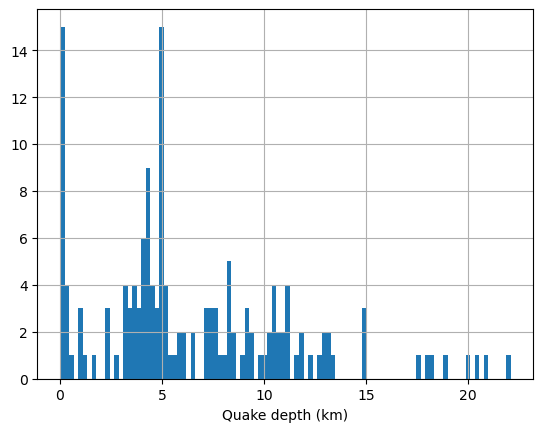

In [72]:
# answer here
plt.hist(quake.depth,100)
plt.grid(True)
plt.xlabel('Quake depth (km)')
plt.show()

In [73]:
fig = px.histogram(quake,   #specify what dataframe to use
             x="depth",  #specify the variable for the histogram 
             nbins=50,       #number of bins for the histogram 
             height=400,     #dimensions of the figure
             width=600);
fig.show()

In [74]:
quake['marker_size'] =np.fix(np.exp(quake['mc'])) # add marker size as exp(mag)
quake['magnitude bin'] = 0.5*np.fix(2*quake['mc']) # add marker size as exp(mag)

In [79]:
fig = px.scatter_geo(quake,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),
                     height=600, width=600,
                     size='marker_size', color='mc',
                     hover_name="rms",
                     hover_data=['date','mc','depth']);
fig.update_geos(resolution=110, showcountries=True)
fig.update_geos(resolution=110, showcountries=True,projection_type="orthographic")

In [80]:
quakes2plot=quake.sort_values(by='mc')

quakes2plot.head()

,date,HH/MM/SS,latitude,longitude,depth,rms,mc,vp/vs,marker_size,magnitude bin
22,2/2/2015,8:53 AM,8.932,-83.400,11.9,0.1,3.4,1.73,29.0,3.0
6,1/30/2015,12:20 PM,9.517,-82.914,0.1,0.9,3.5,1.73,33.0,3.5
0,1/28/2015,8:46 PM,5.534,-82.590,5.4,0.1,3.9,1.73,49.0,3.5
68,2/11/2015,5:04 PM,4.724,-81.847,3.7,0.6,3.9,1.69,49.0,3.5
75,2/12/2015,1:40 PM,5.777,-82.767,10.7,0.8,3.9,1.74,49.0,3.5


In [81]:
fig = px.scatter_geo(quakes2plot,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),
                     height=600, width=600,
                     size='marker_size', color='mc',
                     hover_name="date",
                     hover_data=['date','mc','depth']);
fig.update_geos(resolution=110, showcountries=True)
# fig.update_geos(resolution=110, showcountries=True,projection_type="orthographic")
